In [5]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



In [6]:
# Load the CSV file
data = pd.read_csv("Salary Data.csv")

# Display the first few rows
data.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
# Assuming dataset has columns 'YearsExperience' and 'Salary'
X = data[['Years of Experience']]
y = data['Salary']

# Check shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (375, 1)
Shape of y: (375,)


In [10]:
# Set number of folds (e.g., 5)
k = 5

# Initialize KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

print("K-Fold setup complete with", k, "splits.")


K-Fold setup complete with 5 splits.


In [11]:
# Create a Linear Regression model
model = LinearRegression()
print("Linear Regression model initialized.")


Linear Regression model initialized.


In [14]:
# Check if any missing (NaN) values exist
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [18]:
# Fill missing numeric values with the mean of the column
data['Years of Experience'].fillna(data['Years of Experience'].mean(), inplace=True)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

print("After filling missing values:")
print(data.isnull().sum())


After filling missing values:
Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_11508\1819513315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Years of Experience'].fillna(data['Years of Experience'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11508\1819513315.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [19]:
data.fillna({'Years of Experience': data['Years of Experience'].mean(),
             'Salary': data['Salary'].mean()}, inplace=True)


In [22]:
data.isna().sum()


Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

In [23]:
# Fill categorical columns with their mode (most common value)
for col in ['Age', 'Gender', 'Education Level', 'Job Title']:
    data[col] = data[col].fillna(data[col].mode()[0])


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Education Level', 'Job Title']:
    data[col] = le.fit_transform(data[col])


In [25]:
X = data[['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']]
y = data['Salary']


In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

mse_scores = []
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

print("Average MSE:", np.mean(mse_scores))
print("Average R²:", np.mean(r2_scores))


Average MSE: 244023097.6561892
Average R²: 0.8891172310544195


In [28]:
import numpy as np

# Suppose your model expects 5 features in this order:
# ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience']

# Create a 2D NumPy array with all 5 feature values:
new_data = np.array([[25, 1, 3, 2, 5]])  # Replace these numbers with your actual input

# Predict
prediction = model.predict(new_data)
print(prediction)

[83157.88201786]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


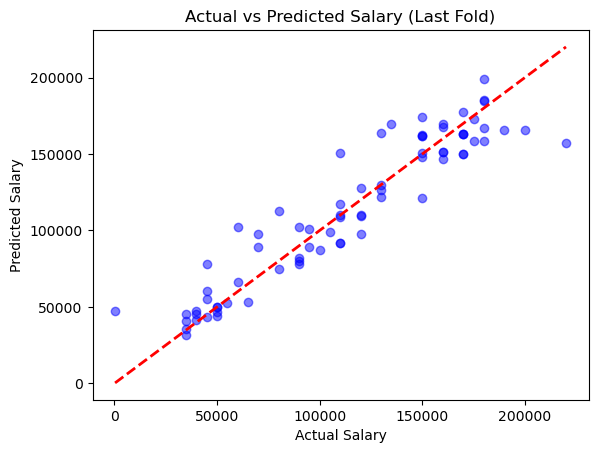

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # alpha makes overlapping points slightly transparent
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # perfect prediction line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Last Fold)")
plt.show()